# K維樹(KD Tree)

In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/timsainb/tensorflow2-generative-models/blob/master/1.0-Variational-Autoencoder-fashion-mnist.ipynb)

##### 先引入我們需要的packages

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices

# MNIST Dataset

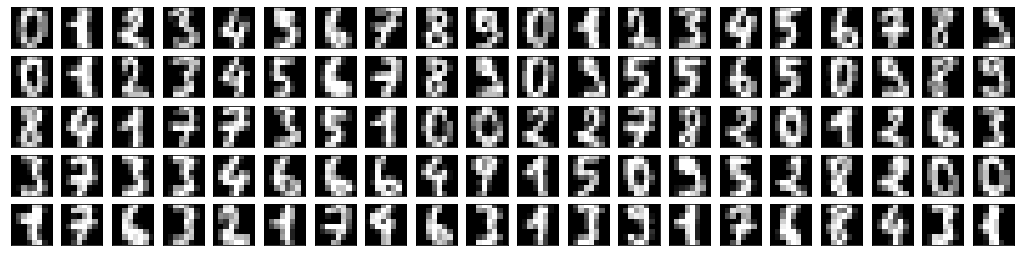

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data/16
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray()
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show()

# KD Tree - Build

In [ ]:
def BuildSubtree(root,points,index,depth):
    if(depth==0):
        return
    length=len(index)
    med=np.median(points[index,:],axis=0)
    BOOL=abs(np.sum(points[index,:]<med,axis=0)-(length/2))
    dim=np.argmin(BOOL)
    median=med[dim]
    left_index=np.intersect1d(np.where(points[:,dim]<median),index)
    right_index=np.intersect1d(np.where(points[:,dim]>=median),index)
    root.dim,root.median=dim,median
    if(len(left_index)==1 and len(right_index)==1):
        root.left=left_index
        root.right=right_index
        return
    elif(len(left_index)==1):
        root.left=left_index
        root.right=Tree()
        BuildSubtree(root.right,points,right_index,depth-1)
        return
    elif(len(right_index)==1):
        root.right=right_index
        root.left=Tree()
        BuildSubtree(root.left,points,left_index,depth-1)
        return
    else:
        root.left=Tree()
        BuildSubtree(root.left,points,left_index,depth-1)
        root.right=Tree()
        BuildSubtree(root.right,points,right_index,depth-1)
        return

# KD Tree - Search

In [ ]:
def SearchSubtree(root,data):
    if(type(root)==type(np.array(1))):
        return int(root)
    else:
        if(root.median>data[root.dim]):
            print("left")
            root=SearchSubtree(root.left,data)
            return int(root)
        else:
            print("right")
            root=SearchSubtree(root.right,data)
            return int(root)

# Build and Search

In [ ]:
class Tree:
    def __init__(self):
        self.left=None
        self.right=None
        self.dim=None
        self.median=None
root=Tree()
N,M=X.shape
Index=np.array(range(0,N))
BuildSubtree(root,X,Index,15)
search_index=SearchSubtree(root,X[100,:])
print(search_index)

right
right
left
left
right
left
left
right
left
right
left
100
